# Plot the Published DES Data Vectors

Plotting the public DES Y1 data vectors.  This sacc file was created for the Firecrown 3x2 pt. tutorial and plotting is adapted from that notebook: 

https://arxiv.org/abs/1708.01538

https://github.com/LSSTDESC/firecrown/blob/master/examples/des_y1_3x2pt/plot_des_data_model.ipynb. 

In [10]:
import numpy as np
import sacc
import matplotlib.pyplot as plt

In [11]:
n_src = 4
n_lens = 5

In [12]:
data_dir = '/global/cscratch1/sd/elp25/TXPipe/data/desy1/outputs/'

In [13]:
des_data = sacc.Sacc.load_fits(data_dir+'desy1_twopoint_data_real_published_blinded.sacc')

## Plot the Redshift Distribution

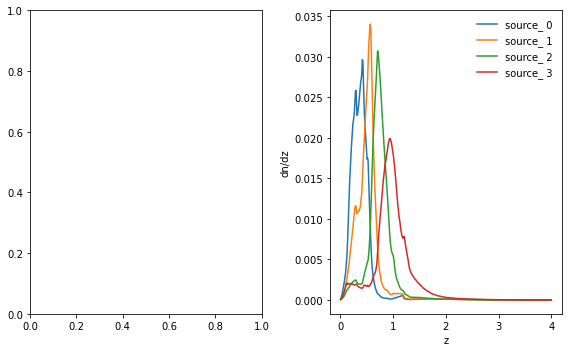

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

ax = axs[0]
#for i in range(n_lens):
#    tr = des_data.get_tracer('lens%d' % i)
#    ax.plot(tr.z, tr.nz/np.sum(tr.nz), label='lens %d' % i)

#ax.set_xlabel('z')
#ax.set_ylabel('dn/dz')
#ax.legend(loc=1, frameon=False)
#ax.set_xlim(0.0, 1.5)

ax = axs[1]
for i in range(n_src):
    tr = des_data.get_tracer('source_%d' % i)
    ax.plot(tr.z, tr.nz/np.sum(tr.nz), label='source_ %d' % i)

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)

plt.tight_layout()

In [16]:
xip = sacc.standard_types.galaxy_shear_xi_plus
des_data.get_tracer_combinations(xip)

[('source_0', 'source_0'),
 ('source_0', 'source_1'),
 ('source_0', 'source_2'),
 ('source_0', 'source_3'),
 ('source_1', 'source_1'),
 ('source_1', 'source_2'),
 ('source_1', 'source_3'),
 ('source_2', 'source_2'),
 ('source_2', 'source_3'),
 ('source_3', 'source_3')]

## Plot Correlation Functions

15 points in published data
15 points in published data
17 points in published data
16 points in published data
17 points in published data
18 points in published data
16 points in published data
17 points in published data
18 points in published data
18 points in published data
4 points in published data
5 points in published data
6 points in published data
5 points in published data
6 points in published data
7 points in published data
5 points in published data
7 points in published data
7 points in published data
8 points in published data


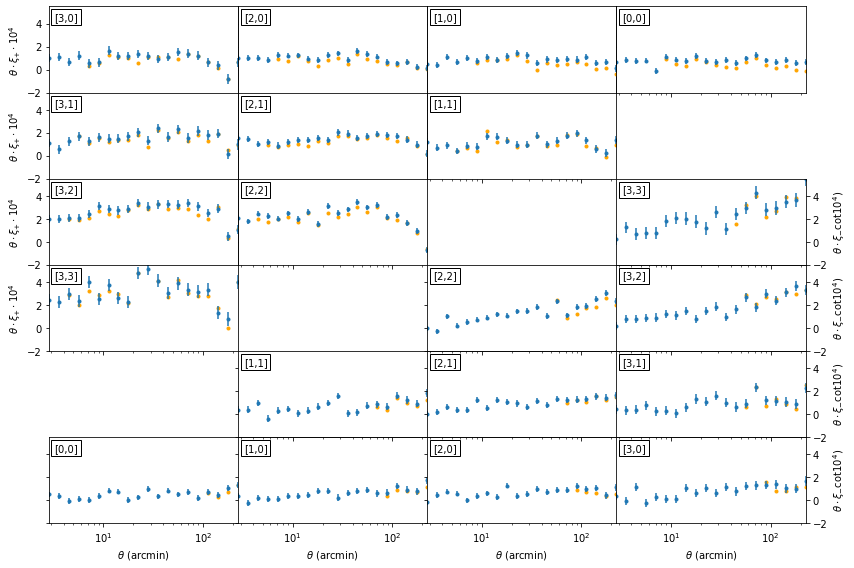

In [22]:
import sacc
#matplotlib.use('agg')
#matplotlib.rcParams["xtick.direction"]='in'
#matplotlib.rcParams["ytick.direction"]='in'


#filename = data_dir+'des_y1_3x2pt_sacc_data.fits'
filename = '/global/cscratch1/sd/elp25/TXPipe/data/desy1/outputs/twopoint_data_real.sacc'
s = sacc.Sacc.load_fits(filename)

import sacc

xip = sacc.standard_types.galaxy_shear_xi_plus

source_tracers = set()
for b1, b2 in s.get_tracer_combinations(xip):
    source_tracers.add(b1)
    source_tracers.add(b2)

sources = list(sorted(source_tracers))

xip = sacc.standard_types.galaxy_shear_xi_plus
xim = sacc.standard_types.galaxy_shear_xi_minus
nsource = len(sources)

plt.figure(figsize=(nsource*3,(nsource)*2))

theta = s.get_tag('theta', xip)
tmin = np.min(theta)
tmax = np.max(theta)

coord = lambda dt,i,j: (nsource+1-j, i) if dt==xim else (j, nsource-1-i)

for dt in [xip, xim]:
    for i in range(len(sources[:])):
        for j in range(len(sources[:])):
            D = s.get_data_points(dt, ('source_%s' %i,'source_%s' %j))


            if len(D)==0:
                continue

            ax = plt.subplot2grid((nsource+2, nsource), coord(dt,i,j))

            scale = 1e-4

            theta = np.array([d.get_tag('theta') for d in D])
            xi    = np.array([d.value for d in D])
            err   = np.array([d.get_tag('error') for d  in D])
            w = err>0
            theta = theta[w]
            xi = xi[w]
            err = err[w]

            plt.errorbar(theta, xi*theta / scale, err*theta / scale, fmt='.',label='data')
            
            DD = des_data.get_data_points(dt, ('source_%s' %j,'source_%s' %i))
            theta = np.array([d.get_tag('theta') for d in DD])
            xi    = np.array([d.value for d in DD])
            
            print(len(theta),'points in published data')
            
            plt.errorbar(theta, xi*theta / scale, marker='.',label='published results',color='orange')
            
            
            plt.xscale('log')
            plt.ylim(-2,5.5)
            plt.xlim(tmin, tmax)

            if dt==xim:
                if j>0:
                    ax.set_xticklabels([])
                else:
                    plt.xlabel(r'$\theta$ (arcmin)')

                if i==nsource-1:
                    ax.yaxis.tick_right()
                    ax.yaxis.set_label_position("right")
                    ax.set_ylabel(r'$\theta \cdot \xi_{-} \cot 10^4)$')
                else:
                    ax.set_yticklabels([])
            else:
                ax.set_xticklabels([])
                if i==nsource-1:
                    ax.set_ylabel(r'$\theta \cdot \xi_{+} \cdot 10^4$')
                else:
                    ax.set_yticklabels([])

            props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
            plt.text(0.03, 0.93, f'[{i},{j}]', transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)


plt.show()